In [5]:
!pip install yfinance
!pip install pandas_datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.9/315.9 kB 4.9 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 3.7 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 794.9 kB/s eta 0:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.9/147.9 kB 3.1 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 2.3 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 4.5 MB/s eta 0:00:0000:0100:01
  Created wheel for frozendict: filename=frozendict-2.4.4-cp311-cp311-macosx_10_9_universal2.whl size=16037 sha256=b6c96eb2a9598922a53bb435211b4c8fd168549c2444c

In [7]:
!pip install yahoo_fin

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 2.2 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 1.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 1.5 MB/s eta 0:00:00ta 0:00:01
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6049 sha256=b2fb580e6680ee0739742c1b6e398bcb3fa4c31269130347e7cd0bc0a7055723
  Stored in directory: /Users/hachikenkazuki/Library/Caches/pip/wheels/3b/25/2a/105d6a15df6914f4d15047691c6c28f9052cc1173e40285d03
Successfully built sgmllib3k
  Attemp

In [8]:
from yahoo_fin import stock_info
import yfinance as yf
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
import datetime

import pickle

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


Download ticker symbols for sp500

In [9]:
def fetch_sp500_tickers():
    # Fetch the S&P 500 table from the Wikipedia page
    table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    sp500_df = table[0]  # The first table is usually the S&P 500 constituents

    # Extract the 'Symbol' column
    tickers = sp500_df['Symbol'].tolist()
    
    return tickers

# Get S&P 500 tickers
tickers = fetch_sp500_tickers()
tickers.sort()

Download stock price for Agilent Technologies

In [10]:
ticker = tickers[0]
print(ticker)

A


In [12]:
#最初のアジレントテクノロジーの株価をダウンロード

# ticker = "9101.t"
stock_price = yf.download(ticker, period="max")

[*********************100%%**********************]  1 of 1 completed


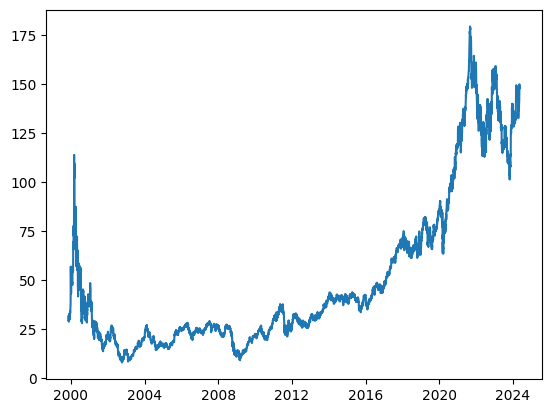

In [13]:
#描画
plt.plot(stock_price["Close"])
plt.show()

In [16]:
#複数銘柄のダウンロード
list_stock = []
# If you want you can download the entire SP500 
#for kkk in range(len(df_sp)):
for k in range(5):
    if k % 100 == 0:
        print(k)
        
    ticker = tickers[k]
    print(ticker)
    stock_price = yf.download(ticker, period="max")
    stock_price["ticker"] = ticker
    
    list_stock.append(stock_price)
    

df_stock = pd.concat(list_stock)

0
A


[*********************100%%**********************]  1 of 1 completed


AAL


[*********************100%%**********************]  1 of 1 completed


AAPL


[*********************100%%**********************]  1 of 1 completed


ABBV


[*********************100%%**********************]  1 of 1 completed


ABNB


[*********************100%%**********************]  1 of 1 completed


In [17]:
#長い時系列のデータを取得

# set ticker symbol ^GSPC = SP500
ticker = "^GSPC"
df = yf.download(ticker, period="max")

[*********************100%%**********************]  1 of 1 completed


Text(0, 0.5, 'USD')

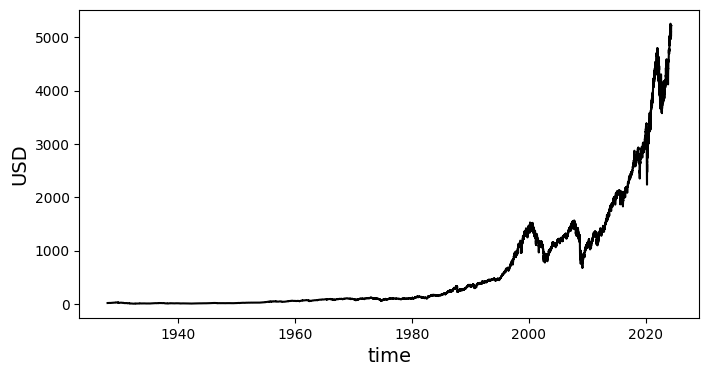

In [18]:
#描画
# use adjusted close
plt.figure(figsize=(8,4))
plt.plot(df["Adj Close"],color="k")
plt.xlabel("time",size=14)
plt.ylabel("USD",size=14)

In [19]:
#対数収益率に注目

# Calculate return
df['Return'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
# This is another way to calculate return
#df['Return'] = df["Adj Close"].pct_change(1).mul(100)
df["Volatility"] = df.Return.abs()

# Drop NA
df.dropna(inplace=True)

Text(0, 0.5, 'USD')

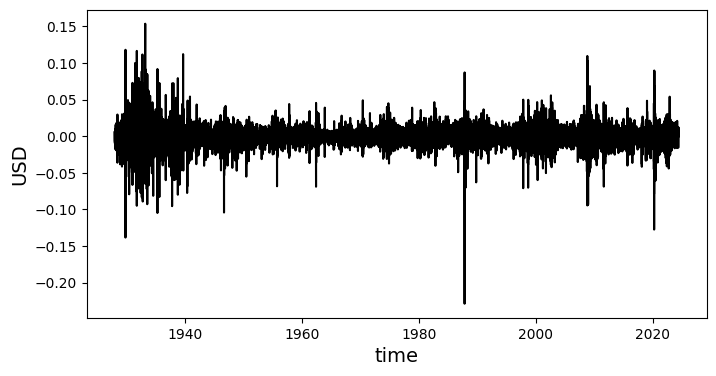

In [20]:
#描画

# Plot return
plt.figure(figsize=(8,4))
plt.plot(df["Return"],color="k")
plt.xlabel("time",size=14)
plt.ylabel("USD",size=14)

Text(0, 0.5, 'USD')

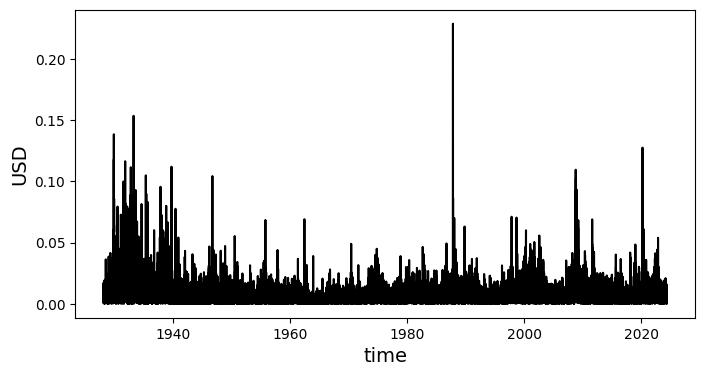

In [22]:
#ボラティリティ：値動きの幅

df['Volatility']=np.abs(df["Return"])

# Plot volatility
plt.figure(figsize=(8,4))
plt.plot(df["Volatility"],color="k")
plt.xlabel("time",size=14)
plt.ylabel("USD",size=14)

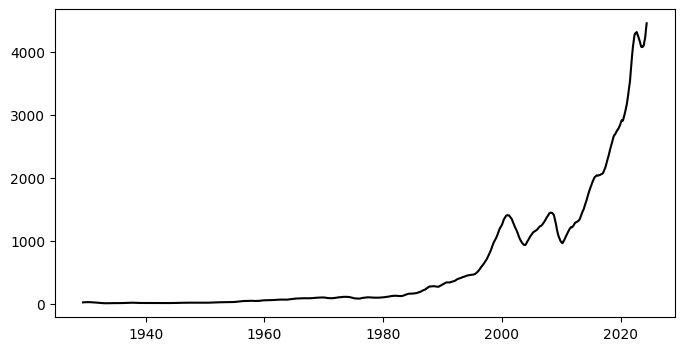

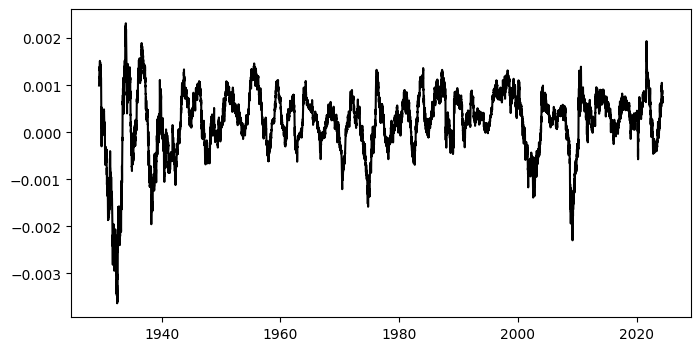

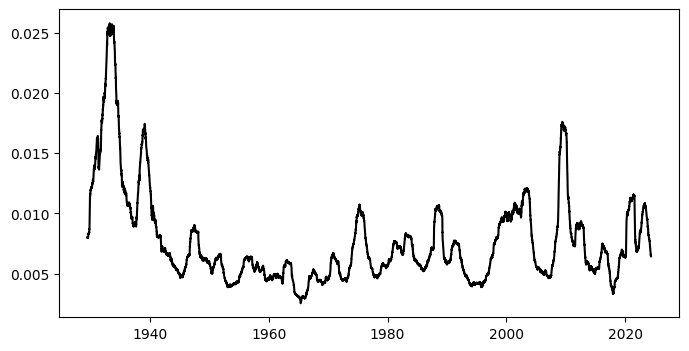

In [23]:
#移動平均

# Moving average of Adjusted close
plt.figure(figsize=(8,4))
plt.plot(df["Adj Close"].rolling(window=360).mean(), color = "k")

# Moving average of Return
plt.figure(figsize=(8,4))
plt.plot(df["Return"].rolling(window=360).mean(), color = "k")

# Moving average of Volatiliy
plt.figure(figsize=(8,4))
plt.plot(df["Volatility"].rolling(window=360).mean(), color = "k")

Auto correlatoin リターンの自己相関関数

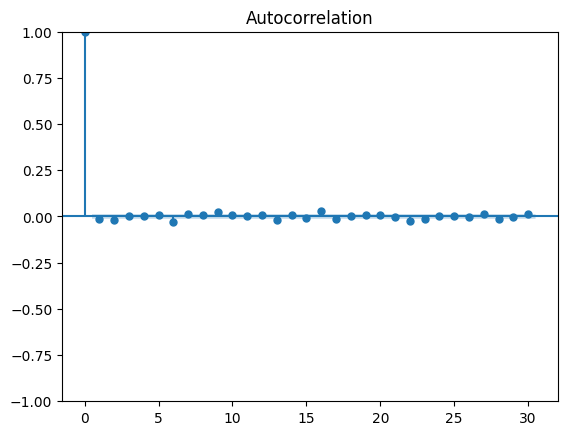

In [24]:
# Importing the required packages
from statsmodels.graphics.tsaplots import plot_acf

# plot autocorrelation of return
plot_acf(df["Return"], zero = True, lags = 30)
plt.show()

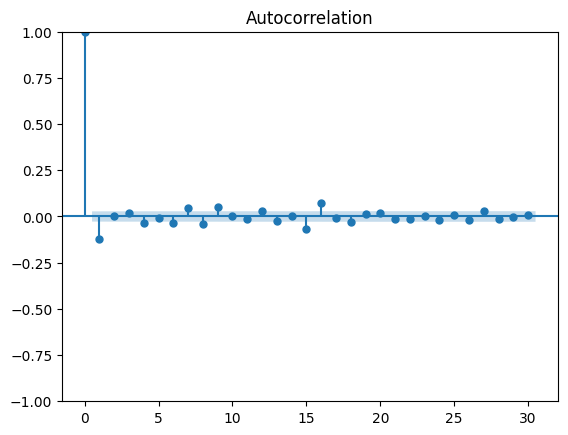

In [25]:
#直近リターンの自己平均関数

# plot autocorrelation of return
plot_acf(df["Return"].iloc[-5000:], zero = True, lags = 30)
plt.show()

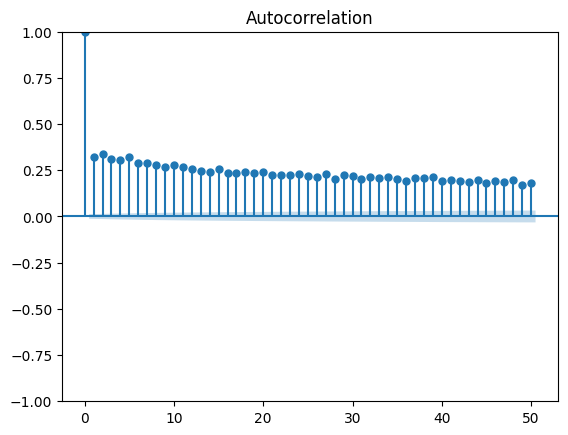

In [26]:
#ボラティリティの自己相関関数

# plot auto correlation for 
plot_acf(df["Volatility"], zero = True, lags = 50)
plt.show()

Analyze return today and return tomorrow 今日のリターンと明日のリターン

In [28]:
from scipy import interpolate
# Create column of Return with lag -1
df["ShiftReturn"] = df["Return"].shift(1)
df.dropna(inplace=True)

In [29]:
# sort dataframe using Return in ascending order 
df.sort_values(by="Return",ascending=True,inplace=True)

# to make life easier
x = df["Return"]
y = df["ShiftReturn"]

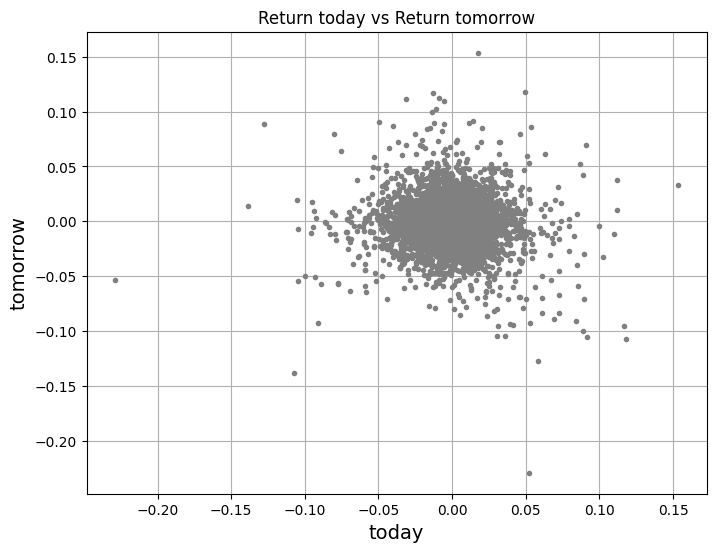

In [30]:
# Plot 
# set figure size
plt.figure(figsize=(8, 6))
# set title
plt.title("Return today vs Return tomorrow")
# plot scatter
plt.plot(x, y, '.', c="grey", label="original")

# set x label and y label
plt.xlabel("today",size=14)
plt.ylabel("tomorrow",size=14)
# add grid
plt.grid()
# show
plt.show() 

Linear Regression

In [31]:
import statsmodels.api as sm
# stats model
reg_linear = sm.OLS(y, x)
result = reg_linear.fit()
# prediction
y_linear = result.predict(x)

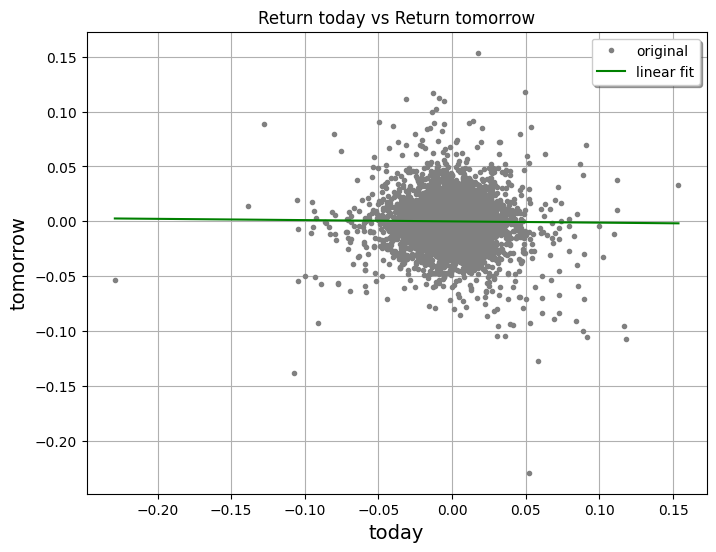

In [32]:
# Plot: set figure size
plt.figure(figsize=(8, 6))
# set title
plt.title("Return today vs Return tomorrow")
# plot scatter
plt.plot(x, y, '.', c="grey", label="original")
# plot spline fit
plt.plot(x, y_linear, '-', c="g", label="linear fit")
# plot legend
plt.legend(loc='best', fancybox=True, shadow=True)
# set x label and y label
plt.xlabel("today",size=14)
plt.ylabel("tomorrow",size=14)
# add grid
plt.grid()
# show
plt.show() 

Spline

In [33]:
# number of nots
# Avoid error related to the Schoenberg-Whitney conditions
knot_numbers = 15

# we place nots using quantiles
x_quantile = np.linspace(0, 1, knot_numbers+2)[1:-1]
q_knots = np.quantile(x, x_quantile) 

x_min = np.quantile(x,0.001)
x_max = np.quantile(x,0.999)
x_new = np.linspace(x_min, x_max, 500)

#df_xy = pd.DataFrame({"x":x, "y":y})
#df_xy.drop_duplicates(inplace=True)

In [34]:
# Interpolate using splines
t,c,k = interpolate.splrep(x, y, t=q_knots, s=1)
yfit = interpolate.BSpline(t,c,k)(x_new)  

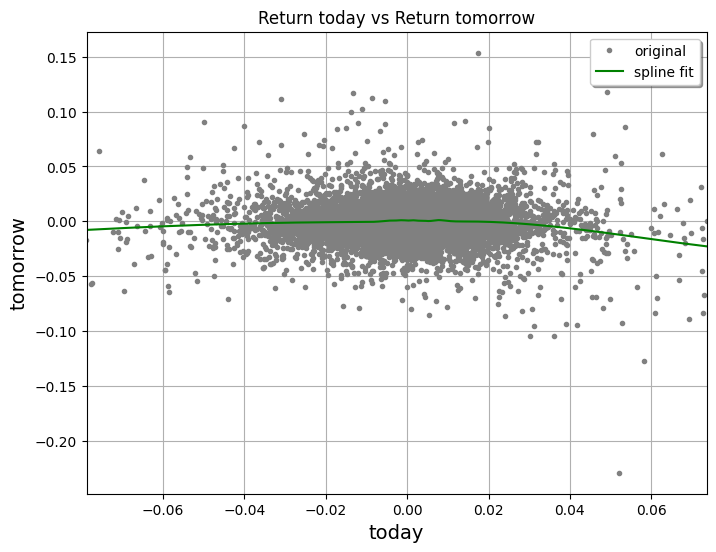

In [35]:
# Plot 
# set figure size
plt.figure(figsize=(8, 6))
# set title
plt.title("Return today vs Return tomorrow")
# plot scatter
plt.plot(x, y, '.', c="grey", label="original")
# plot spline fit
plt.plot(x_new, yfit, '-', c="g", label="spline fit")
# plot legend
plt.legend(loc='best', fancybox=True, shadow=True)
# set x limits
plt.xlim(x_min,x_max)
# set x label and y label
plt.xlabel("today",size=14)
plt.ylabel("tomorrow",size=14)
# add grid
plt.grid()
# show
plt.show() 

Calculate confidence intervals using bootstrap

Anomaly detection 異常検知

In [36]:
#過去の振る舞いから考えて正常とは考えにくい稀な事象を判定
#移動平均と移動標準偏差を用いる

# Resort the dataframe
df.sort_values(by="Date",ascending=True,inplace=True)
# Calculate the moving average and standard deviation
window_size = 90
df['Moving Average'] = df["Return"].rolling(window=window_size).mean()
df['Standard Deviation'] = df['Return'].rolling(window=window_size).std()
df.dropna(inplace=True)

In [37]:
#異常検知のコード
#移動平均と移動標準偏差を用いて4.5標準偏差異常平均から離れたら異常値と判定

# Set the threshold for anomaly detection
threshold = 4.5
df['Lower Bound'] = df['Moving Average'] - (df['Standard Deviation'] * threshold)
df['Upper Bound'] = df['Moving Average'] + (df['Standard Deviation'] * threshold)

# Identify the anomalies
df['Anomaly'] = np.where((df['Return'] > df['Upper Bound']) | (df['Return'] < df['Lower Bound']), 1, 0)

Visualize results

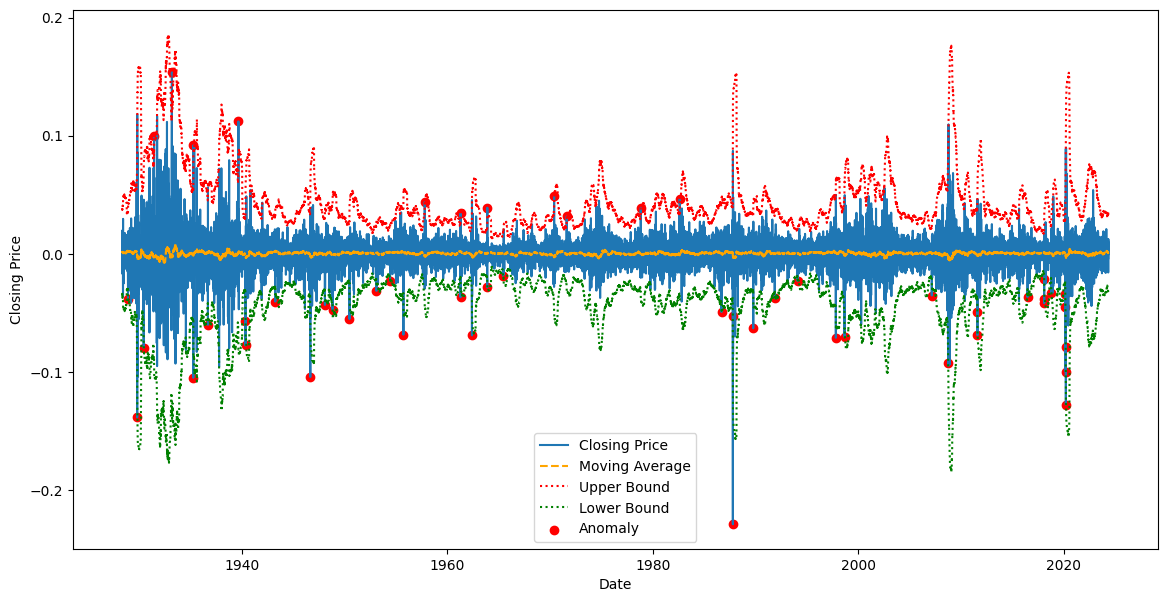

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
1928-12-06    22.910000    22.910000    22.910000    22.910000    22.910000   
1929-10-28    22.740000    22.740000    22.740000    22.740000    22.740000   
1930-06-16    20.559999    20.559999    20.559999    20.559999    20.559999   
1931-06-22    14.610000    14.610000    14.610000    14.610000    14.610000   
1933-03-15     6.810000     6.810000     6.810000     6.810000     6.810000   
1935-04-16     8.220000     8.220000     8.220000     8.220000     8.220000   
1935-04-17     9.010000     9.010000     9.010000     9.010000     9.010000   
1936-09-16    15.000000    15.000000    15.000000    15.000000    15.000000   
1939-09-05    12.640000    12.640000    12.640000    12.640000    12.640000   
1940-05-13    11.110000    11.110000    11.110000    11.110000    11.110000   
1940-05-14    10.280000    10.280000    10.280000   

In [38]:
# Visualize the results
plt.figure(figsize=(14, 7))
plt.plot(df['Return'], label='Closing Price')
plt.plot(df['Moving Average'], label='Moving Average', linestyle='dashed', color='orange')
plt.plot(df['Upper Bound'], label='Upper Bound', linestyle='dotted', color='red')
plt.plot(df['Lower Bound'], label='Lower Bound', linestyle='dotted', color='green')
plt.scatter(df[df['Anomaly'] == 1].index, df[df['Anomaly'] == 1]['Return'], color='red', marker='o', label='Anomaly')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Print the anomalies
print(df[df['Anomaly'] == 1])

Update function

In [47]:
def update(date):
    
    # Restrict data frame
    cond = (df.index <= date) & (df.index >= (start_date - datetime.timedelta(90)))
    df_tmp = df.loc[cond].copy()
    
    plt.cla()
    #plt.rcParams['figure.subplot.bottom'] = 0.5
    plt.plot(df_tmp['Return'], label='Closing Price')
    plt.plot(df_tmp['Moving Average'], label='Moving Average', linestyle='dashed', color='orange')
    plt.plot(df_tmp['Upper Bound'], label='Upper Bound', linestyle='dotted', color='red')
    plt.plot(df_tmp['Lower Bound'], label='Lower Bound', linestyle='dotted', color='green')
    plt.scatter(df_tmp[df_tmp['Anomaly'] == 1].index, df_tmp[df_tmp['Anomaly'] == 1]['Return'], color='red', marker='o', label='Anomaly')
    plt.xticks(rotation=50)
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.tight_layout()
    #ax.legend()

COVID-19

In [48]:
# Add animation module
from matplotlib.animation import FuncAnimation

#開始点
#start_str = "1928-10-01"
#start_str = "1987-10-01"
#start_str = "2007-01-01"
start_str = "2019-12-01"
start_date = datetime.datetime.strptime(start_str,"%Y-%m-%d")
#num_date = (df.index[-1] - start_date).days


date_list = []
for i in range(999):
#for i in range(num_date):
    date = start_date + datetime.timedelta(i)
    date_list.append(date)

MovieWriter imagemagick unavailable; using Pillow instead.


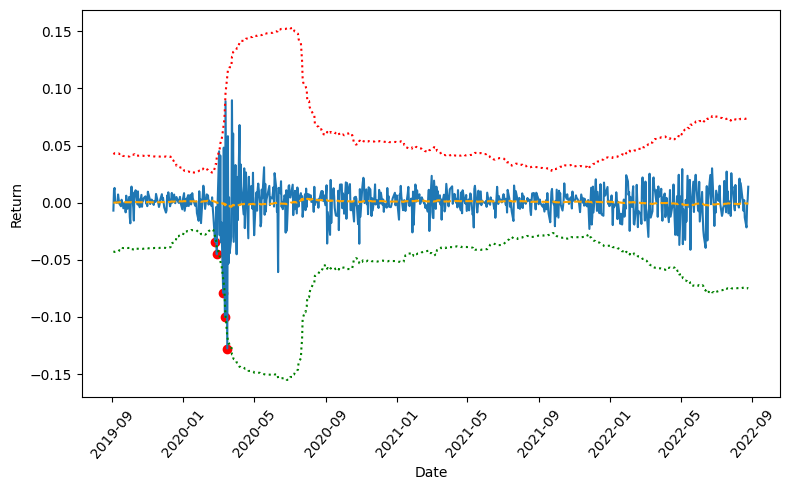

In [49]:
# Takes about Wall time: 2h 30min 10s to animate the entire history
# Set figure
fig = plt.figure(figsize=(8, 5))

# Set animation
anim = FuncAnimation(
    fig=fig,
    func=update,
    frames=date_list,
    interval=40,
)

# Save animation
anim.save("sp500_history_" + start_str + ".gif",writer="imagemagick")

# Show plot
plt.show()

# Close
plt.close()